In [26]:
import matplotlib.pyplot as plt # imports library used for plot creation
import numpy as np # imports library need to handle arrays, matrices and carry out  mathematical operations (i.e, exponent)
%matplotlib inline

In [27]:
class Model: # Define class
    def euler(self, f, Y0, tstop, tstart, h):  # Define function used for forward euler method and respective arguments 
        # User needs to bind the class atrributes with the specified arguments , self 
        # command enables the automated binding of instances with the given arguments
        
        self.f = f
        self.Y0 = Y0
        self.tstop = tstop
        self.tstart = tstart
        self.h = h
        
        number_of_obtainings = int((tstop - tstart)/h) # ensures number of iterations is a float literal (by removing all decimals)
        t = np.zeros(number_of_obtainings + 1)  # creates a 1D np array to store time points tn
        y = np.zeros(number_of_obtainings + 1 ) # creates a 1D np array to store values yn obtained by forward Euler's method
        y[0] = Y0 # Creates initial condition (specified by the user) which enters into the loop to calculate y[n+1]
        
        
        for n in range(number_of_obtainings): # loop which solves iteratively based on forward Euler method
            t[n+1] = t[n] + h # estimates next time point tn+1 based on previous time point tn and step size h
            y[n+1] = y[n] + h * f(y[n], t[n]) # forward Eulers method formula
        return y,t # send the function's result back to the caller

##### In this example, the function to be solved is:
$$
\frac{dy}{dt}\ = -2ty
$$

#### Define function 

In [28]:
def f(y , t): # Define function to be solved 
    dydt = - 2 * t * y # Define function's equation form
    return dydt # send the equation form back to the caller

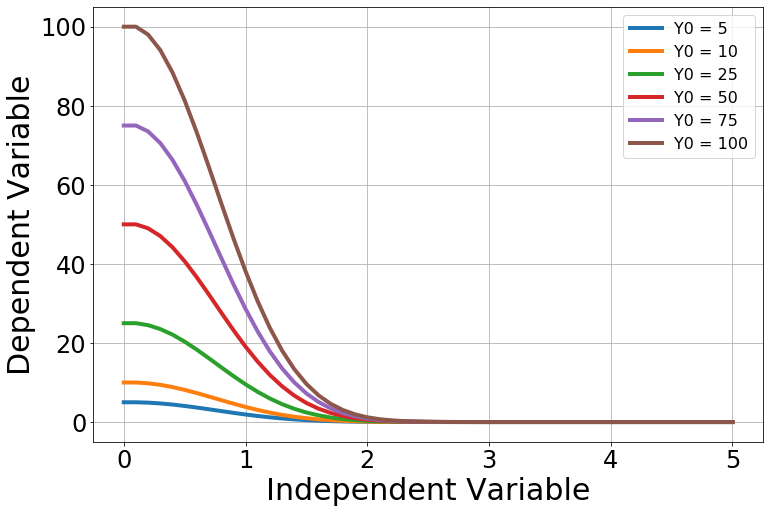

In [29]:
plt.figure(figsize = (12,8))
plt.ylabel('Dependent Variable', fontsize = 30) # to show axis labels and to determine fontsize
plt.xlabel('Independent Variable', fontsize = 30) # to show axis labels and to determine fontsize
plt.xticks(fontsize = 24) # change fontsize of values in x-axis
plt.yticks(fontsize = 24) # change fontsize of values in y-axis
plt.grid(True) # to show grid on the plot
    
for Y0 in [5, 10, 25, 50, 75, 100]: # Specify desired initial condition y[0]=Y0
    MyClass = Model() # initialize class 
    y , t = MyClass.euler(f, Y0, 5, 0, 0.1) # Calls desired function from MyClass
    
    plt.plot(t ,y , linewidth = 4, label =f'Y0 = {Y0}') # Plots numerical solutions obtained by forward Euler method
    plt.legend(loc = 'best',  prop={'size': 16}) # To show which line corresponds to which label (thus YO)


####   Define a new ODE with known plotted solution to ensure class Model functions properly 

In [30]:
def g(y , t): # Defines ODE to be solved
    dydt = 2*t # Defines equation of ODE
    return dydt # sends the equation form back to the caller

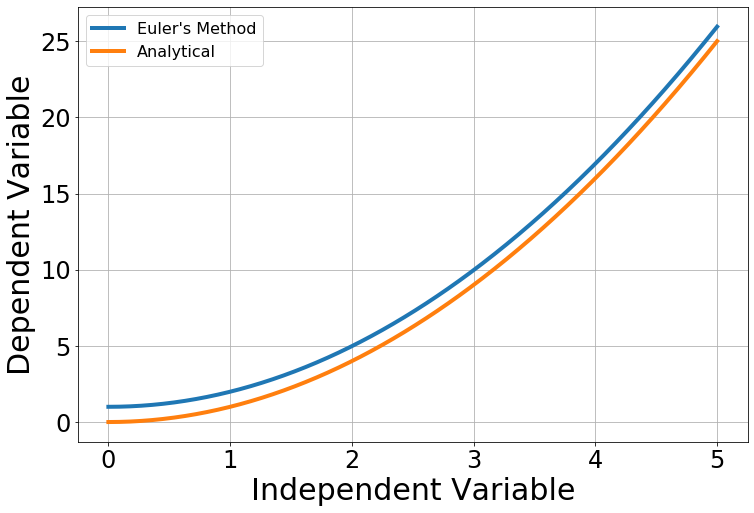

In [31]:
MyClass = Model() # # Initialize class call constructor
y , t = MyClass.euler(g, Y0 = 1, tstart = 0, tstop = 5, h = 0.01) # Calls desired function from MyClass

y_real = np.zeros(len(t)) # creates a 1D np array of equal size to time points, to store analytical solutions y_real

plt.figure(figsize = (12,8))
plt.ylabel('Dependent Variable', fontsize = 30) # to show axis labels and to determine fontsize
plt.xlabel('Independent Variable', fontsize = 30) # to show axis labels and to determine fontsize
plt.xticks(fontsize = 24) # change fontsize of values in x-axis
plt.yticks(fontsize = 24) # change fontsize of values in y-axis
plt.grid(True) # to show grid on the plot

for i in range(0,len(y_real)): # calls loop which solves analytical expression for each time point tn
    y_real[i]=t[i]**2 # form of analytical expression
    
plt.plot(t , y, linewidth = 4, label = "Euler's Method") # plots solutions obtained by forward Euler's method
plt.plot(t , y_real, linewidth = 4, label = "Analytical") # plots solutions obtained by analytical expression
plt.legend(loc = 'best',  prop={'size': 16}) # to show which line corresponds to which label (analytical or numerical)